In [22]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import logging
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Set up logger
logging.basicConfig(level=logging.INFO, format='[%(asctime)s]: %(message)s:')
logger = logging.getLogger()

# Start MLflow experiment
mlflow.set_experiment('insurance_prediction_experiment')


<Experiment: artifact_location='file:///d:/My%20projects/Medical%20Insurane%20Predictor/notebook/mlruns/759212838930993092', creation_time=1735490301928, experiment_id='759212838930993092', last_update_time=1735490301928, lifecycle_stage='active', name='insurance_prediction_experiment', tags={}>

In [23]:
df = pd.read_csv("D:\\My projects\\Medical Insurane Predictor\\medical_insurance.csv")

# Log the data shape
logger.info(f"Loaded dataset with shape: {df.shape}")

# Check for any missing values
if df.isnull().sum().any():
    logger.warning(f"Missing values found in the dataset. Filling with mean or mode.")
    # Handle missing values (you can fill with mean or mode depending on the column type)
    df.fillna(df.mean(), inplace=True)  # For numerical columns
    df.fillna(df.mode().iloc[0], inplace=True)  # For categorical columns

# Encoding categorical columns using LabelEncoder
label_encoder = LabelEncoder()

# Assuming 'sex', 'smoker', and 'region' are categorical
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

# If there are any other categorical features (e.g., age_group), apply label encoding
# df['age_group'] = label_encoder.fit_transform(df['age_group'])

# Log the first few rows of the processed data
logger.info(f"Processed data:\n{df.head()}")

# Proceed with further steps (e.g., train-test split, model training)


[2025-01-02 16:04:56,157]: Loaded dataset with shape: (2772, 7):
[2025-01-02 16:04:56,171]: Processed data:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520:


In [24]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


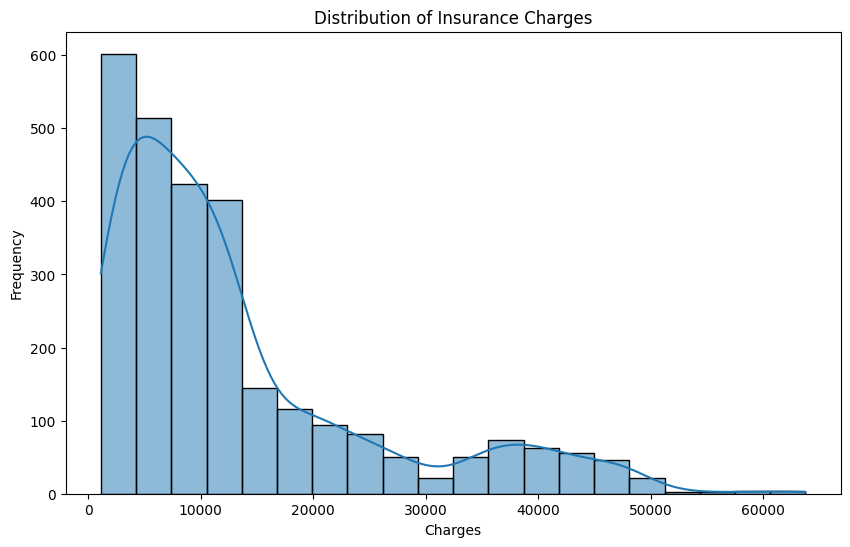

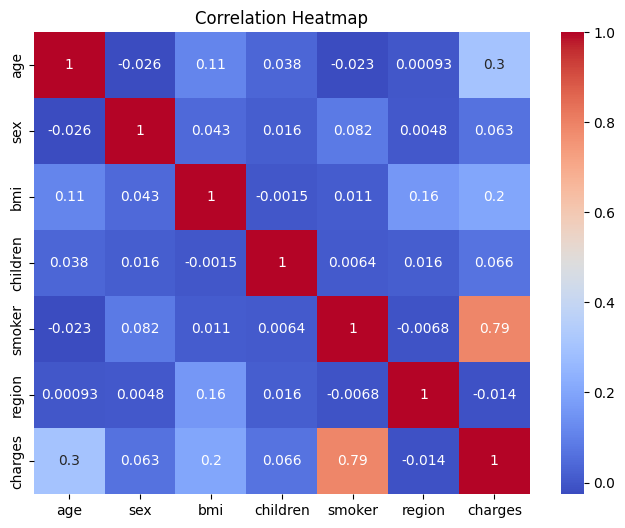

In [25]:
# Plot the distribution of the charges
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], bins=20, kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


[2025-01-02 16:04:57,018]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:
[2025-01-02 16:04:57,028]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:


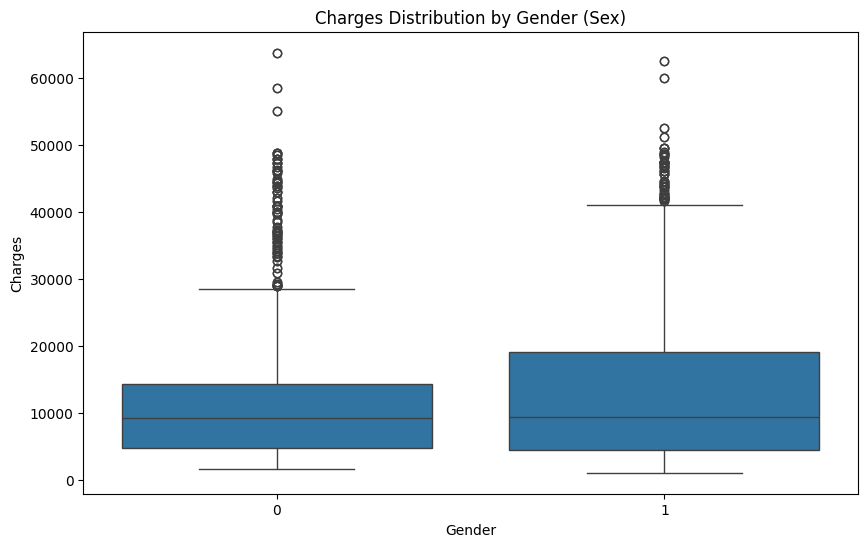

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges Distribution by Gender (Sex)')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()


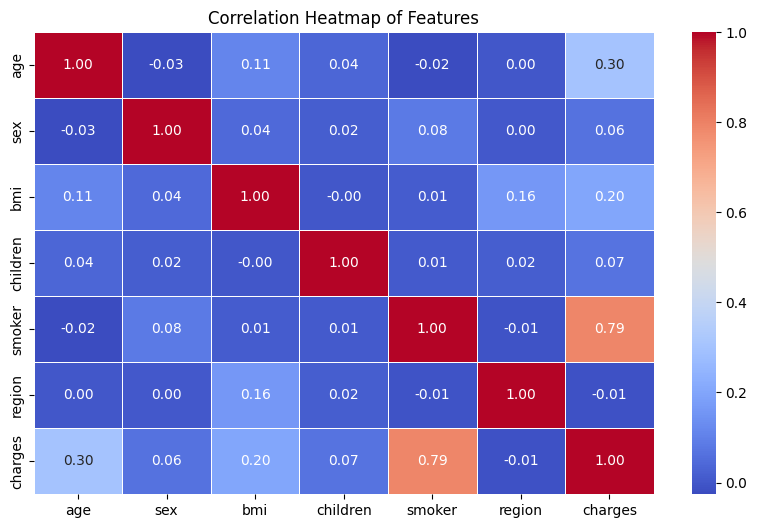

In [27]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()


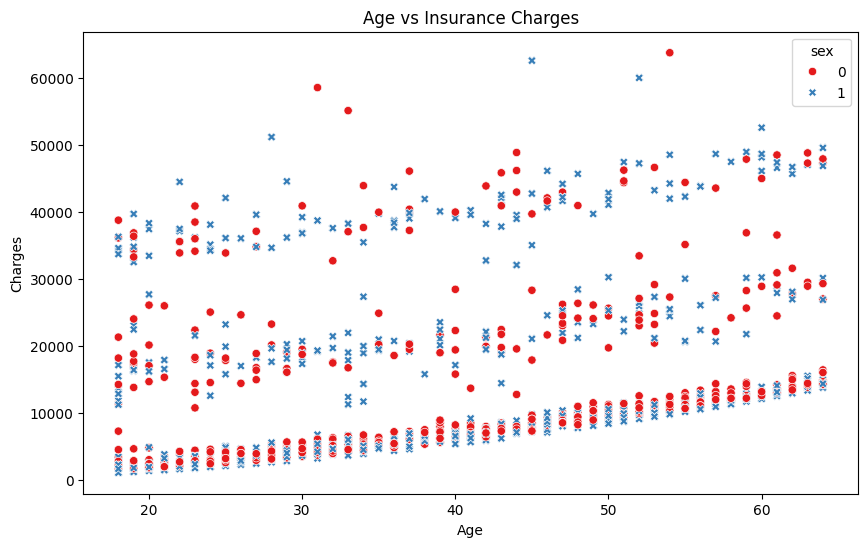

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', data=df, hue='sex', palette='Set1', style='sex')
plt.title('Age vs Insurance Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()


[2025-01-02 16:04:57,688]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:
[2025-01-02 16:04:57,704]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:


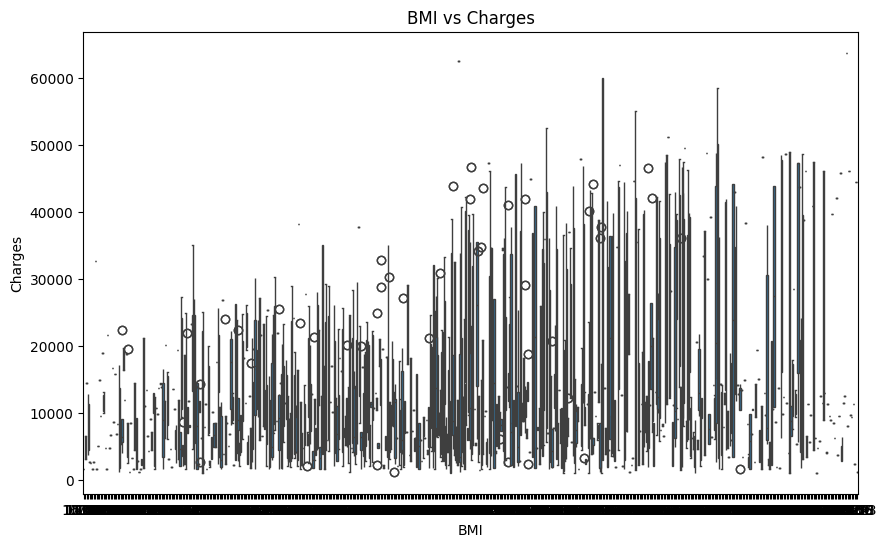

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bmi', y='charges', data=df)
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()


[2025-01-02 16:05:03,717]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:


C:\Users\Kartik\AppData\Local\Temp\ipykernel_18072\2267027242.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker', y='charges', data=df, palette='coolwarm')
[2025-01-02 16:05:03,731]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:


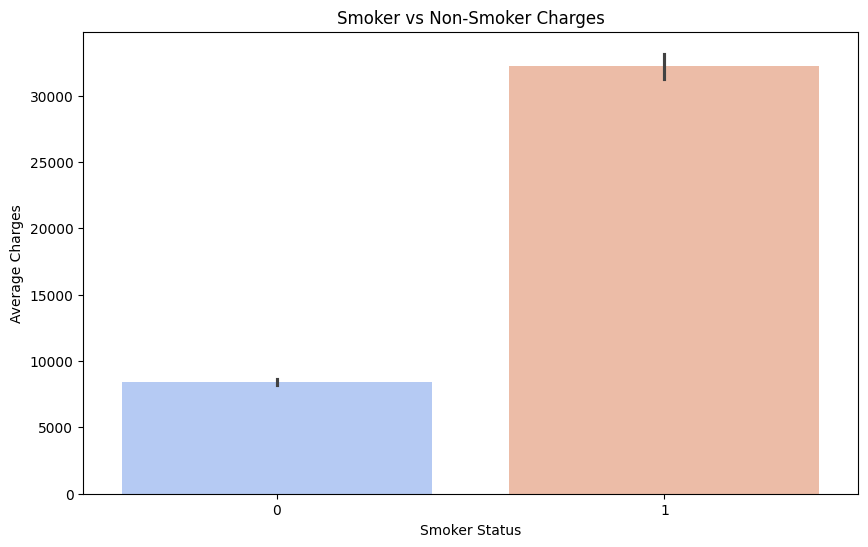

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', data=df, palette='coolwarm')
plt.title('Smoker vs Non-Smoker Charges')
plt.xlabel('Smoker Status')
plt.ylabel('Average Charges')
plt.show()


[2025-01-02 16:05:03,998]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:
[2025-01-02 16:05:04,012]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:


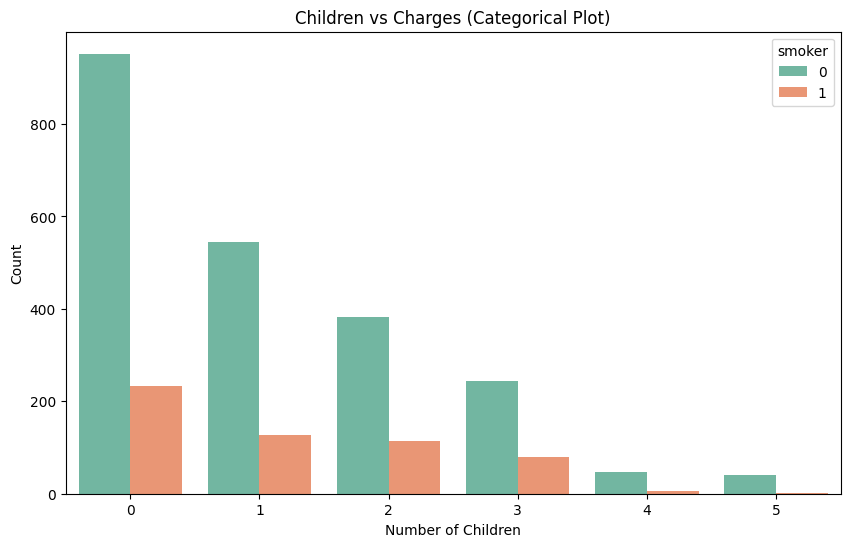

In [31]:
plt.figure(figsize=(10, 6))
sns.countplot(x='children', hue='smoker', data=df, palette='Set2')
plt.title('Children vs Charges (Categorical Plot)')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


[2025-01-02 16:05:04,299]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:
C:\Users\Kartik\AppData\Local\Temp\ipykernel_18072\1186079778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, palette='muted')
[2025-01-02 16:05:04,313]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:


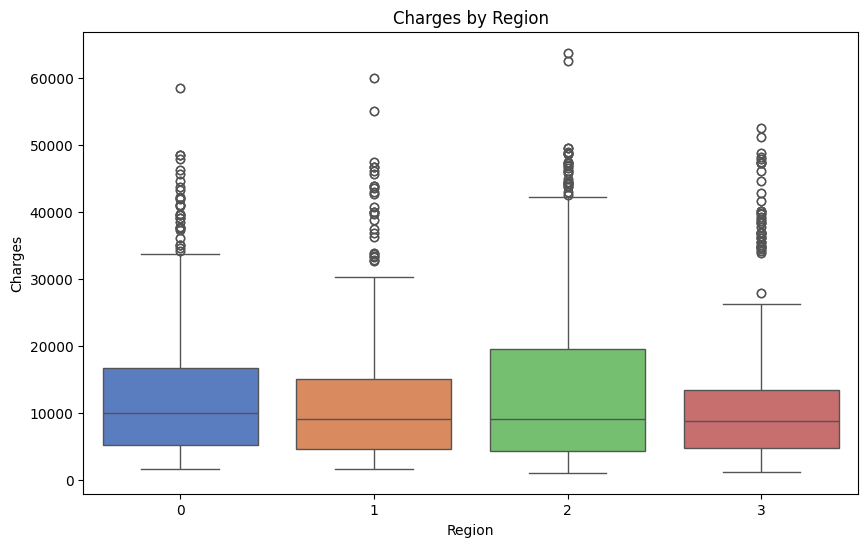

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=df, palette='muted')
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()


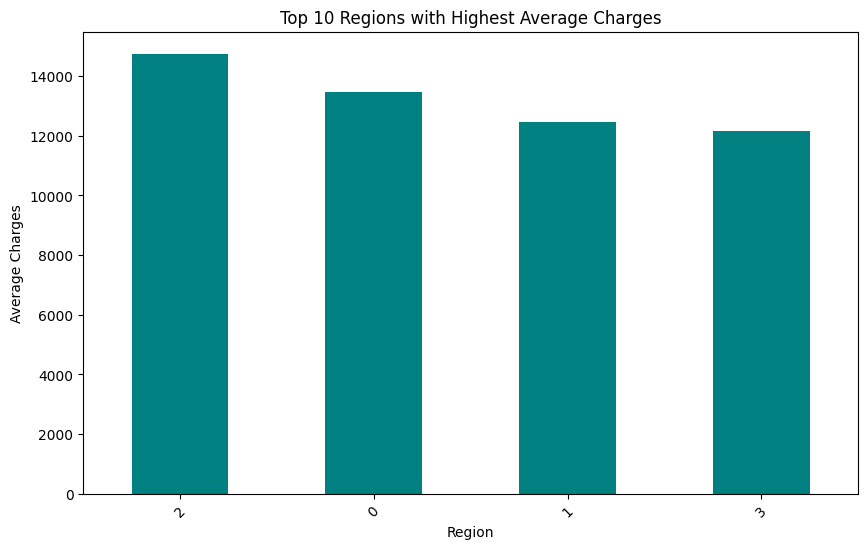

In [33]:
avg_charges_by_region = df.groupby('region')['charges'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_charges_by_region.plot(kind='bar', color='teal')
plt.title('Top 10 Regions with Highest Average Charges')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.xticks(rotation=45)
plt.show()



[2025-01-02 16:05:04,832]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:
C:\Users\Kartik\AppData\Local\Temp\ipykernel_18072\1282052905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='smoker', y='charges', data=df, palette='Set3')
[2025-01-02 16:05:04,847]: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.:


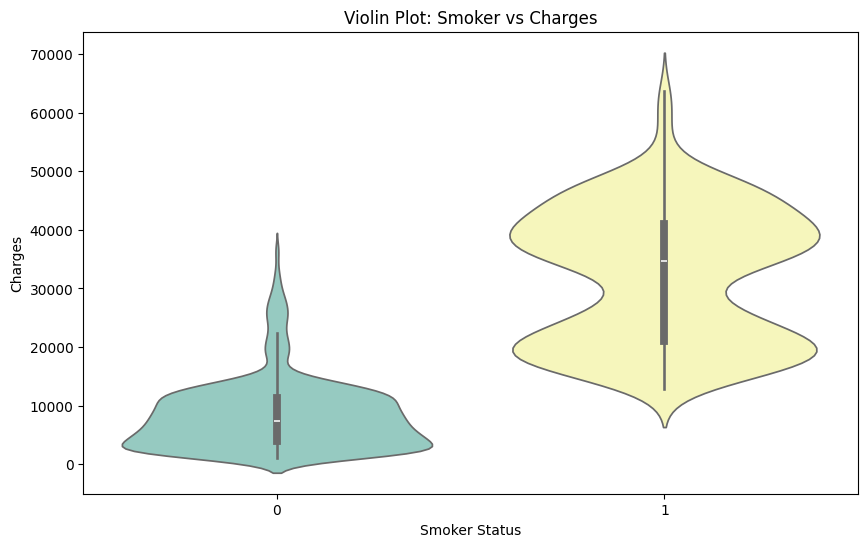

In [34]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='smoker', y='charges', data=df, palette='Set3')
plt.title('Violin Plot: Smoker vs Charges')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.show()


In [35]:
# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logger.info("Train-test split complete")


[2025-01-02 16:05:05,091]: Train-test split complete:


In [36]:
# import mlflow
# import mlflow.sklearn
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np
# import logging

# # Set up logger
# logging.basicConfig(level=logging.INFO)
# logger = logging.getLogger(__name__)

# # Set the MLflow tracking URI (local directory)
# mlflow.set_tracking_uri("file:///D:/My projects/Medical Insurane Predictor/notebook/mlruns")

# # Set the experiment name (creates it if it doesn't exist)
# mlflow.set_experiment("Linear Regression Experiment")

# # Start MLflow tracking
# with mlflow.start_run():
#     # Instantiate and train the model
#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     # Log model parameters
#     mlflow.log_param('model_type', 'LinearRegression')

#     # Make predictions on the test set
#     y_pred = model.predict(X_test)

#     # Compute and log metrics
#     rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#     r2 = r2_score(y_test, y_pred)

#     mlflow.log_metric('rmse', rmse)
#     mlflow.log_metric('r2', r2)

#     # Log the model
#     mlflow.sklearn.log_model(model, artifact_path="models/linear_regression")

#     # Additional logging for confirmation
#     logger.info(f"Model trained and logged: RMSE = {rmse}, R2 = {r2}")

#     # Log an artifact (e.g., feature importance file) for demonstration
#     with open("feature_importance.txt", "w") as f:
#         f.write("Feature importance logging example.\n")
#     mlflow.log_artifact("feature_importance.txt")

# logger.info("MLflow run completed. Check the MLflow UI for details.")


In [40]:
import mlflow
import mlflow.sklearn
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import logging

# Set up logger
logger = logging.getLogger(__name__)
logging.basicConfig(level=logging.INFO)

# End any active MLflow run
mlflow.end_run()

# Start MLflow tracking
mlflow.set_experiment('insurance_predictor')  # Set the experiment name

with mlflow.start_run():  # Start a new run
    
    # Instantiate and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Log model parameters in MLflow
    mlflow.log_param('model_type', 'LinearRegression')
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate and log metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    # Log metrics (RMSE and R2 score) in MLflow
    mlflow.log_metric('rmse', rmse)
    mlflow.log_metric('r2', r2)
    
    # Log the model in MLflow
    mlflow.sklearn.log_model(model, 'insurance_model')
    
    # Log results using the logger
    logger.info(f"Model trained: RMSE = {rmse}, R2 = {r2}")


2025/01/02 16:45:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
[2025-01-02 16:45:53,270]: Model trained: RMSE = 6318.423803002623, R2 = 0.7398864322395977:


In [38]:
# Save the trained model to a pickle file
with open('insurance_model.pkl', 'wb') as file:
    pickle.dump(model, file)

logger.info("Model saved to 'insurance_model.pkl'")


[2025-01-02 16:05:12,745]: Model saved to 'insurance_model.pkl':


In [39]:
# Log the model's pickle file as an artifact
mlflow.log_artifact('insurance_model.pkl')

# Log additional artifacts if required
mlflow.log_artifact('feature_importance.txt')  # Example: hypothetical file for feature importance
